In [1]:
import random
import numpy as np
from scipy import rand, randn
from typing import List
import  matplotlib.pyplot as plt
from scipy.special import loggamma
import copy

In [7]:
def plot(probs):    
    plt.plot(probs)
    plt.ylabel('Log Probability')
    plt.xlabel('Iteration')

In [3]:
def prob(M: np.matrix, order: List[int]):
    p = 0.0
    for i in range(1, len(order)):
        sl = np.array(2 * M[:, order[i - 1]] + M[:, order[i]])
        ns = [sum(sl == j) for j in range(0, 4)]
        p -= loggamma(ns[0] + ns[1] + 1/2) + loggamma(ns[2] + ns[3] + 1/2)
        p += sum(map(lambda n: loggamma(n + 1/4), ns))
    return p

In [4]:
def move(state, times=1):
    state_copy = copy.deepcopy(state)
    for p in range(times):
        i, j = random.sample(range(0, len(state) - 1), 2)
        state_copy[i], state_copy[j] = state_copy[j], state_copy[i]
    return state_copy

In [5]:
# simulated annealing algorithm
def simulated_annealing(matrix, order, n_iterations=100, iter_per_temp=50, temp=1, a=0.99, k=3):
    solution = order
    probs = []
    prob_solution = 0
    exps = []
    prob_new_solution = 0
    for i in range(n_iterations):
    # for i in range(n_iterations):
        for _ in range(iter_per_temp):
            # t = 1 - (i + 1) / n_iterations
            new_solution = move(solution)
            # -100 - -99 = -100 + 99 = -1
            prob_solution = prob(matrix, solution)
            prob_new_solution = prob(matrix, new_solution)
            delta = prob_solution - prob_new_solution
            if prob_new_solution > prob_solution:
                solution = new_solution
                probs.append(prob_new_solution)
            else:

                exp = np.exp(-delta / temp)
                # print(make_alg_info(temp, delta, (prob_solution - prob_new_solution) / temp, exp))
               
                if random.uniform(0, 1) < exp:
                    solution = new_solution
                    probs.append(prob_new_solution)
        # if i % 10 == 0:
        #     print(f"Old solution {prob_solution}, new solution {prob_new_solution}")
        temp *= a
        # print(f"Current temperature {temp}")

        
    return probs, solution, prob_solution, exps

-876.8391779195006


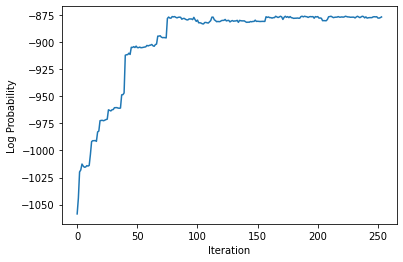

In [8]:
path = 'matrix.csv'
matrix = np.loadtxt(path, dtype='i', delimiter=' ')
order = [i for i in range(len(matrix[0]))]
order = random.sample(order, len(order))
probs, solution, prob_solution, exps = simulated_annealing(matrix, order)
plot(probs)
print(probs[-1])
plt.show()